## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [12]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [14]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.9430 - accuracy: 0.2991 - val_loss: 1.7649 - val_accuracy: 0.3686
Epoch 2/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.6995 - accuracy: 0.3958 - val_loss: 1.6393 - val_accuracy: 0.4189
Epoch 3/500
50000/50000 [==============================] - 5s 110us/step - loss: 1.6140 - accuracy: 0.4235 - val_loss: 1.6703 - val_accuracy: 0.4073
Epoch 4/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.5601 - accuracy: 0.4441 - val_loss: 1.5318 - val_accuracy: 0.4539
Epoch 5/500
50000/50000 [==============================] - 6s 110us/step - loss: 1.5024 - accuracy: 0.4648 - val_loss: 1.5399 - val_accuracy: 0.4516
Epoch 6/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.4661 - accuracy: 0.4782 - val_loss: 1.5134 - val_accuracy: 0.4665
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 7s 145us/step - loss: 0.5869 - accuracy: 0.7871 - val_loss: 1.8753 - val_accuracy: 0.5192
Epoch 56/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.5755 - accuracy: 0.7938 - val_loss: 1.9853 - val_accuracy: 0.5114
Epoch 57/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.5779 - accuracy: 0.7922 - val_loss: 1.9406 - val_accuracy: 0.5115
Epoch 58/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.5694 - accuracy: 0.7948 - val_loss: 1.9394 - val_accuracy: 0.5112
Epoch 59/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.5557 - accuracy: 0.7985 - val_loss: 1.9862 - val_accuracy: 0.5147
Epoch 60/500
50000/50000 [==============================] - 8s 150us/step - loss: 0.5501 - accuracy: 0.8031 - val_loss: 1.9792 - val_accuracy: 0.5149
Epoch 61/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.5265 - accuracy: 0.8116 - val

50000/50000 [==============================] - 5s 110us/step - loss: 0.2809 - accuracy: 0.8986 - val_loss: 3.5050 - val_accuracy: 0.4973
Epoch 110/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.2650 - accuracy: 0.9040 - val_loss: 3.5650 - val_accuracy: 0.4942
Epoch 111/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.2376 - accuracy: 0.9136 - val_loss: 3.5134 - val_accuracy: 0.4921
Epoch 112/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.2499 - accuracy: 0.9122 - val_loss: 3.5605 - val_accuracy: 0.4982
Epoch 113/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.2506 - accuracy: 0.9097 - val_loss: 3.6179 - val_accuracy: 0.5004
Epoch 114/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.2770 - accuracy: 0.9001 - val_loss: 3.6754 - val_accuracy: 0.4953
Epoch 115/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.2693 - accuracy: 0.9024

50000/50000 [==============================] - 5s 110us/step - loss: 0.2477 - accuracy: 0.9130 - val_loss: 4.5599 - val_accuracy: 0.4933
Epoch 164/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.1710 - accuracy: 0.9389 - val_loss: 4.7874 - val_accuracy: 0.4925
Epoch 165/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.1473 - accuracy: 0.9470 - val_loss: 4.8314 - val_accuracy: 0.4982
Epoch 166/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.1632 - accuracy: 0.9409 - val_loss: 4.7939 - val_accuracy: 0.4915
Epoch 167/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.2386 - accuracy: 0.9179 - val_loss: 4.7502 - val_accuracy: 0.4956
Epoch 168/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.1367 - accuracy: 0.9514 - val_loss: 4.8721 - val_accuracy: 0.5003
Epoch 169/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.1466 - accuracy: 0.9477

50000/50000 [==============================] - 6s 111us/step - loss: 0.2327 - accuracy: 0.9239 - val_loss: 5.6471 - val_accuracy: 0.4766
Epoch 218/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.2223 - accuracy: 0.9255 - val_loss: 5.7827 - val_accuracy: 0.4896
Epoch 219/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.1473 - accuracy: 0.9481 - val_loss: 5.7000 - val_accuracy: 0.4964
Epoch 220/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.1136 - accuracy: 0.9599 - val_loss: 5.7099 - val_accuracy: 0.4957
Epoch 221/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0748 - accuracy: 0.9737 - val_loss: 5.8029 - val_accuracy: 0.4889
Epoch 222/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0938 - accuracy: 0.9681 - val_loss: 6.0153 - val_accuracy: 0.4859
Epoch 223/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.1918 - accuracy: 0.9355

50000/50000 [==============================] - 5s 110us/step - loss: 0.1018 - accuracy: 0.9644 - val_loss: 6.3299 - val_accuracy: 0.4902
Epoch 272/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.0712 - accuracy: 0.9745 - val_loss: 6.3046 - val_accuracy: 0.4953
Epoch 273/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0856 - accuracy: 0.9704 - val_loss: 6.3885 - val_accuracy: 0.4905
Epoch 274/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.2247 - accuracy: 0.9302 - val_loss: 6.0970 - val_accuracy: 0.4824
Epoch 275/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.1220 - accuracy: 0.9592 - val_loss: 6.2261 - val_accuracy: 0.4913
Epoch 276/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0536 - accuracy: 0.9814 - val_loss: 6.2991 - val_accuracy: 0.4977
Epoch 277/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0442 - accuracy: 0.9849

50000/50000 [==============================] - 5s 110us/step - loss: 0.1978 - accuracy: 0.9382 - val_loss: 6.6839 - val_accuracy: 0.4910
Epoch 326/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.1479 - accuracy: 0.9526 - val_loss: 6.6686 - val_accuracy: 0.4941
Epoch 327/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0657 - accuracy: 0.9775 - val_loss: 6.8346 - val_accuracy: 0.4951
Epoch 328/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.0553 - accuracy: 0.9808 - val_loss: 6.8900 - val_accuracy: 0.4959
Epoch 329/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 6.9497 - val_accuracy: 0.4920
Epoch 330/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0403 - accuracy: 0.9866 - val_loss: 6.9345 - val_accuracy: 0.4934
Epoch 331/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.1939 - accuracy: 0.9421

50000/50000 [==============================] - 5s 109us/step - loss: 0.2363 - accuracy: 0.9302 - val_loss: 6.7385 - val_accuracy: 0.4817
Epoch 380/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.1157 - accuracy: 0.9628 - val_loss: 7.0066 - val_accuracy: 0.4856
Epoch 381/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.0572 - accuracy: 0.9804 - val_loss: 6.9791 - val_accuracy: 0.4957
Epoch 382/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 6.9354 - val_accuracy: 0.5027
Epoch 383/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0635 - accuracy: 0.9783 - val_loss: 7.1916 - val_accuracy: 0.4897
Epoch 384/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.1483 - accuracy: 0.9523 - val_loss: 6.9971 - val_accuracy: 0.4889
Epoch 385/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.1539 - accuracy: 0.9498

50000/50000 [==============================] - 6s 110us/step - loss: 0.0073 - accuracy: 0.9993 - val_loss: 6.5393 - val_accuracy: 0.5015
Epoch 434/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0060 - accuracy: 0.9995 - val_loss: 6.5612 - val_accuracy: 0.5037
Epoch 435/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 6.6438 - val_accuracy: 0.5053
Epoch 436/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 6.7861 - val_accuracy: 0.5036
Epoch 437/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 6.8037 - val_accuracy: 0.4970
Epoch 438/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.4509 - accuracy: 0.8886 - val_loss: 5.8696 - val_accuracy: 0.4764
Epoch 439/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.2096 - accuracy: 0.9347

50000/50000 [==============================] - 5s 108us/step - loss: 0.0209 - accuracy: 0.9960 - val_loss: 5.5063 - val_accuracy: 0.4998
Epoch 488/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0100 - accuracy: 0.9995 - val_loss: 5.6800 - val_accuracy: 0.5027
Epoch 489/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0080 - accuracy: 0.9996 - val_loss: 5.8133 - val_accuracy: 0.5071
Epoch 490/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 5.9308 - val_accuracy: 0.5048
Epoch 491/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0046 - accuracy: 0.9999 - val_loss: 6.0615 - val_accuracy: 0.5023
Epoch 492/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 6.1391 - val_accuracy: 0.5040
Epoch 493/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0036 - accuracy: 0.9999

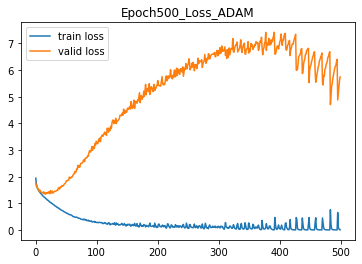

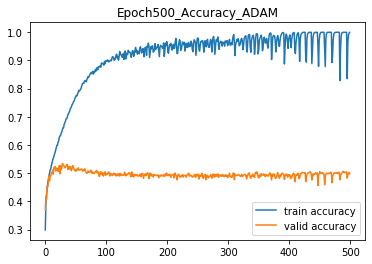

In [21]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Epoch500_Loss_ADAM")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Epoch500_Accuracy_ADAM")
plt.show()

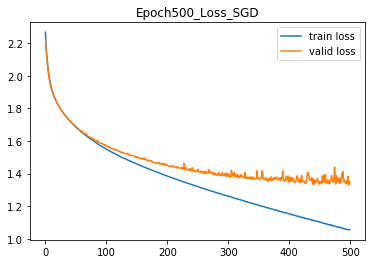

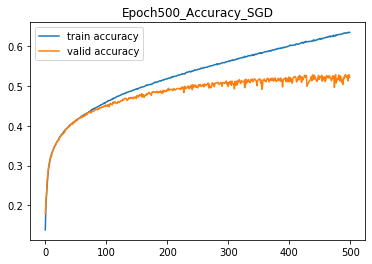

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Epoch500_Loss_SGD")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Epoch500_Accuracy_SGD")
plt.show()

## 結論 : 在overfitting的部分, 優化器Adam會隨著epoch增加變得更為明顯.